In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import statistics
import math
import numpy as np

In [2]:
data = pd.read_csv('data/merged.csv', index_col = 0)
data

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,...,valence,tempo,lyric,debut_date,peak_position,peak_date,weeks_on_chart,on_billboard,billboard_rating,lyric_stemmed
0,tim mcgraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.57500,0.491,0.000000,...,0.4250,76.009,He said the way my blue eyes shined Put those ...,09.23.06,40.0,01.13.07,20.0,1,1,he said the way my blue eye shine put those ge...
12,a perfectly good heart,Taylor Swift,Taylor Swift,2006-10-24,220146,46,0.483,0.00349,0.751,0.000000,...,0.2680,156.092,Why would you wanna break a perfectly good hea...,NaN,NaN,NaN,NaN,0,0,"cory' eye are like a jungl he smiles, it' like..."
11,invisible,Taylor Swift,Taylor Swift,2006-10-24,203226,48,0.612,0.63700,0.394,0.000000,...,0.2330,96.001,She can't see the way your eyes Light up when ...,NaN,NaN,NaN,NaN,0,0,"state the obvious, i didn't get my perfect fan..."
9,our song,Taylor Swift,Taylor Swift,2006-10-24,201106,54,0.668,0.11100,0.672,0.000000,...,0.5390,89.011,I was ridin' shotgun with my hair undone In th...,10.13.07,16.0,01.19.08,36.0,1,1,you have a way of come easili to me and when y...
8,mary's song,Taylor Swift,Taylor Swift,2006-10-24,213080,50,0.403,0.01770,0.627,0.000000,...,0.3740,74.900,"She said, I was seven and you were nine I look...",NaN,NaN,NaN,NaN,0,0,i didn't know what i would find when i went lo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,snow on the beach,Midnights (3am Edition),Taylor Swift,2022-10-21,256124,85,0.659,0.73500,0.323,0.003210,...,0.1540,110.007,I saw flecks of what could've been lights But ...,11.05.22,4.0,11.05.22,6.0,1,1,no word appear befor me in the aftermath salt ...
153,lavender haze,Midnights (3am Edition),Taylor Swift,2022-10-21,202395,86,0.735,0.20400,0.444,0.001200,...,0.0984,97.038,Meet me at midnight Staring at the ceiling wit...,11.05.22,2.0,11.05.22,6.0,1,1,you'r talk shit for the hell of it you'r terri...
167,high infidelity,Midnights (3am Edition),Taylor Swift,2022-10-21,231475,84,0.646,0.72300,0.529,0.000000,...,0.7550,87.862,I didn't know you were keeping count You said ...,11.05.22,33.0,11.05.22,3.0,1,1,didn't notic you walkin' all over my peac of m...
159,bejeweled,Midnights (3am Edition),Taylor Swift,2022-10-21,194165,85,0.700,0.06610,0.550,0.000102,...,0.4120,164.003,Didn't notice you walkin' all over my peace of...,11.05.22,6.0,11.05.22,6.0,1,1,it onli hurt thi much right now wa what i wa t...


In [3]:
# get subset of relevant spotify features + billboard binary
spotify = data.iloc[:,6:15]
spotify['billboard_rating'] = data.iloc[:,-2]
spotify['on_billboard'] = data.iloc[:,-3]
features = list(spotify.columns)
del features[len(features) - 2:]
features

['danceability',
 'acousticness',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'valence',
 'tempo']

In [4]:
spotify

,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,billboard_rating,on_billboard
0,0.580,0.57500,0.491,0.000000,0.1210,-6.462,0.0251,0.4250,76.009,1,1
12,0.483,0.00349,0.751,0.000000,0.1280,-5.726,0.0365,0.2680,156.092,0,0
11,0.612,0.63700,0.394,0.000000,0.1470,-5.723,0.0243,0.2330,96.001,0,0
9,0.668,0.11100,0.672,0.000000,0.3290,-4.931,0.0303,0.5390,89.011,1,1
8,0.403,0.01770,0.627,0.000000,0.1820,-5.280,0.0292,0.3740,74.900,0,0
...,...,...,...,...,...,...,...,...,...,...,...
155,0.659,0.73500,0.323,0.003210,0.1160,-13.425,0.0436,0.1540,110.007,1,1
153,0.735,0.20400,0.444,0.001200,0.1700,-10.519,0.0684,0.0984,97.038,1,1
167,0.646,0.72300,0.529,0.000000,0.0885,-10.179,0.0864,0.7550,87.862,1,1
159,0.700,0.06610,0.550,0.000102,0.0910,-9.130,0.0653,0.4120,164.003,1,1


In [5]:
def plot_boxplot(feature):
    plt.figure(figsize=(10, 6))
    title= f"Distribution of {feature.title()} across each Billboard class"
    title= title.title()
    plt.title(title, fontdict={"fontsize": 15})
    g= sns.boxplot(x= spotify["billboard_rating"], y=spotify[feature], palette= "Purples") 
    sns.swarmplot(x= spotify["billboard_rating"], y=spotify[feature], color= "#454146") 
    g.set_xticklabels(['Above Median (37) Peak Position', "Below Median (37) Peak Position"])
    g.set_xlabel("Billboard Class")
    g.set_ylabel(feature.title())

In [6]:
# Normalizing columns
for f in features:
    spotify[f] = (spotify[f]- spotify[f].mean()) / spotify[f].std()

print((spotify[features[0]]).mean()) # should be ~ zero
print((spotify[features[0]]).std()) # should be ~ 1

-3.573735653231273e-16
1.0


/Users/avascharfstein/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/avascharfstein/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


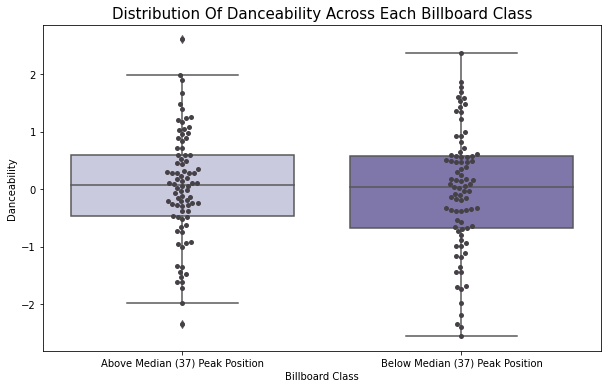

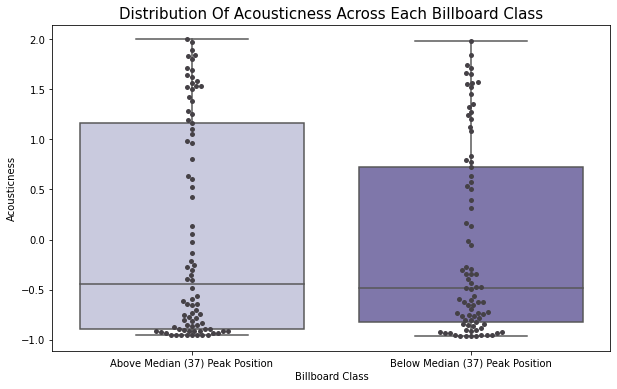

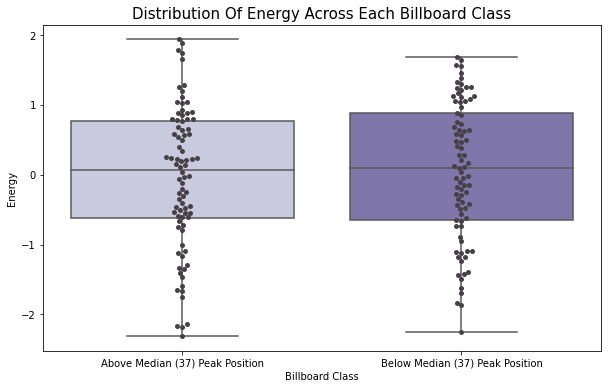

/Users/avascharfstein/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/avascharfstein/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3540: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


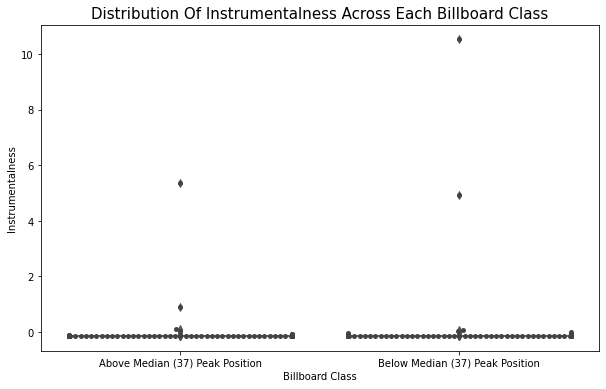

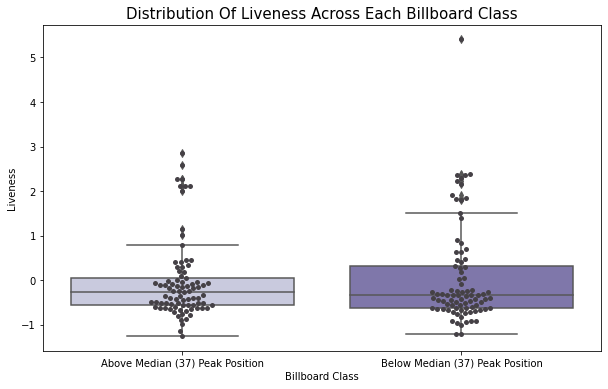

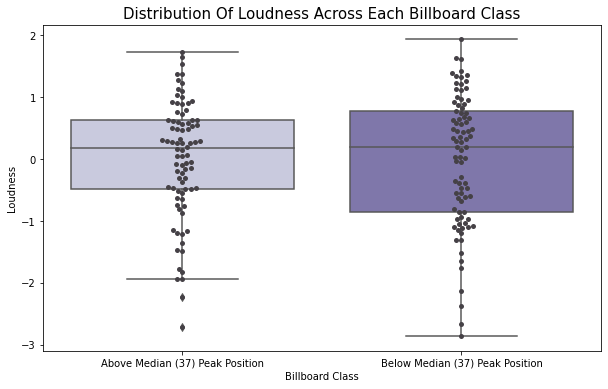

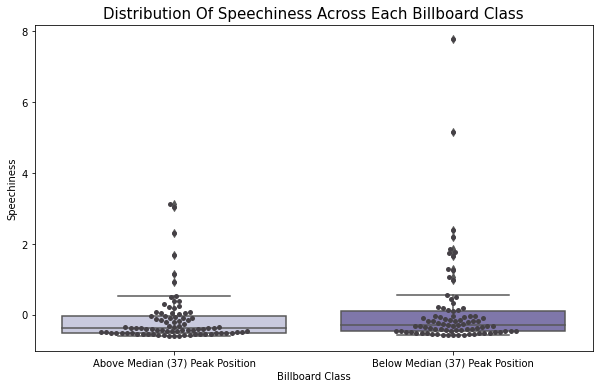

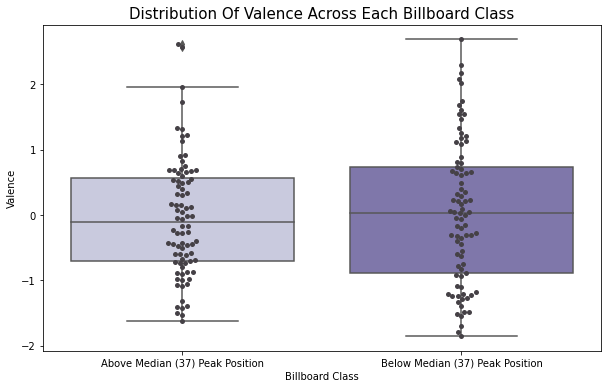

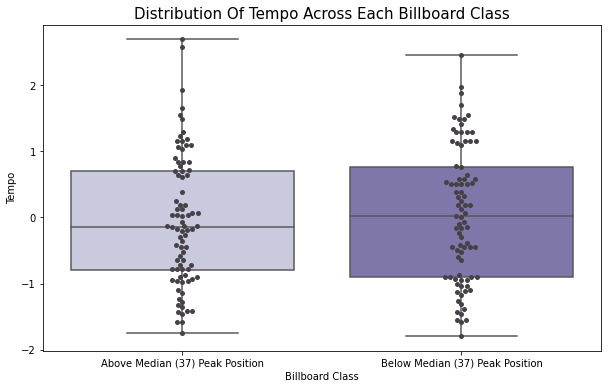

In [7]:
for f in features:
    plot_boxplot(f)
plt.show()

In [8]:
x = np.array(spotify[features])
y = np.array(spotify["billboard_rating"])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

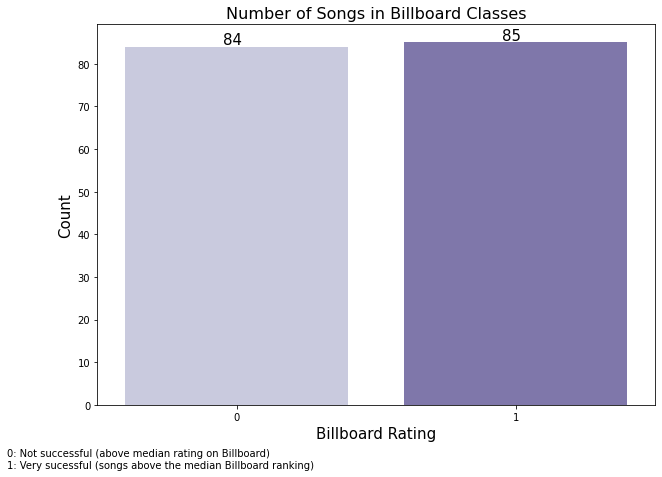

In [42]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x=y, palette="Purples")
for p, label in zip(ax.patches, spotify["billboard_rating"].value_counts(ascending=True)):
    ax.annotate(label, ((p.get_x()+p.get_width()/2)-.05, p.get_height()+0.5), fontsize = 15)
plt.title("Number of Songs in Billboard Classes",fontsize = 16)
plt.xlabel("Billboard Rating", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.figtext(0,0,"0: Not successful (above median rating on Billboard)\n1: Very sucessful (songs above the median Billboard ranking)")
plt.show()

In [10]:
def evaluate_model(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred, average='weighted')
    confusionmatrix = confusion_matrix(y_test, y_pred)
    return {'y_pred': y_pred, 'accuracy': accuracy, 'f1': f1score, 'confusion': confusionmatrix}

def disp_confusion(c, title):
    sns.heatmap(c, annot=True, cmap="Purples")
    plt.title(f"Confusion Matrix for {title} Features", fontsize = 15)
    plt.figtext(0,0,"0: Not successful (above median rating on Billboard)\n1: Very sucessful (songs above the median Billboard ranking)")
    

In [11]:
accuracy = []; f1 = []; confusion = []
model_lr = None
for i in range(5):
    model_lr = LogisticRegression().fit(X_train, y_train)
    lr_results = evaluate_model(model_lr)
    accuracy.append(lr_results['accuracy'])
    f1.append(lr_results['f1'])
    confusion.append(lr_results['confusion'])
    
lr_accuracy = np.mean(accuracy)
lr_f1 = np.mean(f1)
print(f"Accuracy: {lr_accuracy}\nF1 Score: {lr_f1}\n")

Accuracy: 0.39215686274509803
F1 Score: 0.35957244545433464



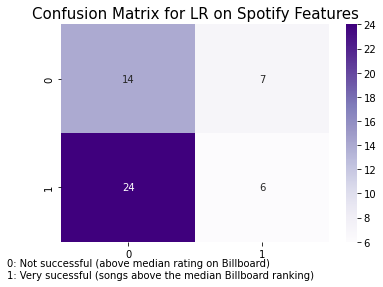

In [12]:
disp_confusion(confusion[0], title="LR on Spotify")

In [13]:
accuracy = []; f1 = []; confusion = []
model_rf = None
for i in range(5):
    model_rf = RandomForestClassifier().fit(X_train, y_train)
    rf_results = evaluate_model(model_rf)
    accuracy.append(rf_results['accuracy'])
    f1.append(rf_results['f1'])
    confusion.append(rf_results['confusion'])
    
rf_accuracy = np.mean(accuracy)
rf_f1 = np.mean(f1)
print(f"Accuracy: {rf_accuracy}\nF1 Score: {rf_f1}\n")

Accuracy: 0.5098039215686274
F1 Score: 0.5122385052929543



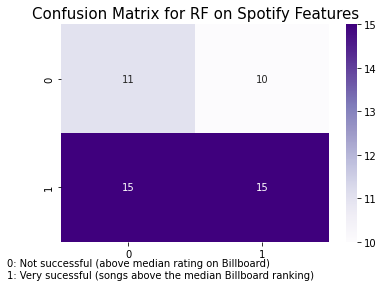

In [14]:
disp_confusion(confusion[0], title="RF on Spotify")

In [15]:
results = pd.DataFrame(
    {'Model': ['Logistic Regression','Random Forest'], 
    'Accuracy': [lr_accuracy,rf_accuracy],
    'F1 Score': [lr_f1,rf_f1]})
results.set_index('Model',inplace=True)
results

,Accuracy,F1 Score
Model,,
Logistic Regression,0.392157,0.359572
Random Forest,0.509804,0.512239


In [16]:
tfidf = pd.read_csv('data/tfidf_embedding.csv')
sum(np.array(tfidf['name']) == np.array(data["name"])) == len(data) # songs are in the same order in the tfidf and data dataframes

True

In [17]:
tfidf = tfidf.drop('name', axis=1)
features = tfidf.columns
tfidf

,15,16,16th,17,18,1950,20,2003,22,29th,...,years,yell,yes,yesterday,yeugh,yogurt,york,young,younger,youyou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113858
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [18]:
x = np.array(tfidf)
y = np.array(data["billboard_rating"])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
accuracy = []; f1 = []; confusion = []
model_lr = None
for i in range(5):
    model_lr = LogisticRegression().fit(X_train, y_train)
    lr_results = evaluate_model(model_lr)
    accuracy.append(lr_results['accuracy'])
    f1.append(lr_results['f1'])
    confusion.append(lr_results['confusion'])
    
lr_accuracy = np.mean(accuracy)
lr_f1 = np.mean(f1)
print(f"Accuracy: {lr_accuracy}\nF1 Score: {lr_f1}\n")

Accuracy: 0.45098039215686275
F1 Score: 0.4022770398481973



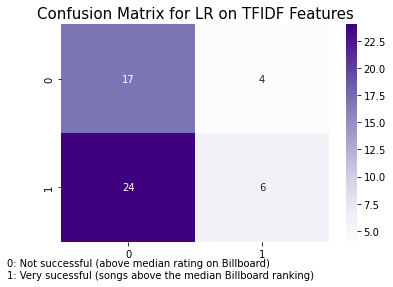

In [20]:
# Fails to classify the songs that did not make it on the billboard
disp_confusion(confusion[0], title="LR on TFIDF")

In [21]:
accuracy = []; f1 = []; confusion = []
model_rf = None
for i in range(5):
    model_rf = RandomForestClassifier().fit(X_train, y_train)
    rf_results = evaluate_model(model_rf)
    accuracy.append(rf_results['accuracy'])
    f1.append(rf_results['f1'])
    confusion.append(rf_results['confusion'])
    
rf_accuracy = np.mean(accuracy)
rf_f1 = np.mean(f1)
print(f"Accuracy: {rf_accuracy}\nF1 Score: {rf_f1}\n")

Accuracy: 0.48235294117647065
F1 Score: 0.46077467409340966



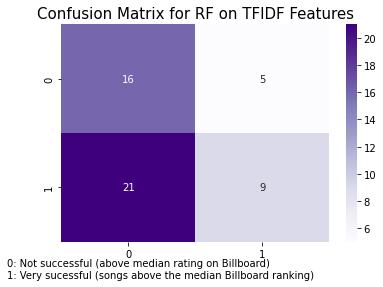

In [22]:
disp_confusion(confusion[0], title="RF on TFIDF")

In [23]:
results = pd.DataFrame(
    {'Model': ['Logistic Regression','Random Forest'], 
    'Accuracy': [lr_accuracy,rf_accuracy],
    'F1 Score': [lr_f1,rf_f1]})
results.set_index('Model',inplace=True)
results

,Accuracy,F1 Score
Model,,
Logistic Regression,0.450980,0.402277
Random Forest,0.482353,0.460775


In [24]:
merged = pd.concat([tfidf,spotify], axis = 1)
merged

,15,16,16th,17,18,1950,20,2003,22,29th,...,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,billboard_rating,on_billboard
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.789014,-0.488818,-0.142643,-0.273590,0.366279,-0.581371,0.090945,-1.550799,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.435677,1.578178,-0.142643,-0.571325,1.934763,-0.459628,2.075807,-0.596220,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.807349,1.042687,-0.142643,2.115497,1.653342,-0.457937,0.105982,-0.291485,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.301631,-0.537012,-0.142643,-0.249579,0.615353,-0.556008,-0.731069,1.662083,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.947762,1.192624,-0.142643,1.155060,1.231389,-0.510354,0.922983,-0.357519,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.295538,0.849910,-0.141959,-0.715391,-0.541242,-0.408902,0.737529,-0.905086,1,1
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.553684,-1.859675,0.056192,-0.345622,-1.760375,-0.045364,-1.698439,1.344245,1,1
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.621513,-0.392429,-0.141639,-0.081502,-1.101928,0.328320,-0.310038,-0.423197,1,1
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.239895,-0.285331,-0.142643,-0.663767,-0.969663,0.455136,1.744997,-1.168251,1,1


In [25]:
merged1 = merged.drop(['billboard_rating','on_billboard'], axis=1)
features = merged1.columns
merged1

,15,16,16th,17,18,1950,20,2003,22,29th,...,youyou,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-0.098674,0.789014,-0.488818,-0.142643,-0.273590,0.366279,-0.581371,0.090945,-1.550799
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.567335,-0.435677,1.578178,-0.142643,-0.571325,1.934763,-0.459628,2.075807,-0.596220
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-0.132828,-0.807349,1.042687,-0.142643,2.115497,1.653342,-0.457937,0.105982,-0.291485
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.481922,-0.301631,-0.537012,-0.142643,-0.249579,0.615353,-0.556008,-0.731069,1.662083
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-0.021826,-0.947762,1.192624,-0.142643,1.155060,1.231389,-0.510354,0.922983,-0.357519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113858,-0.158444,-0.295538,0.849910,-0.141959,-0.715391,-0.541242,-0.408902,0.737529,-0.905086
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.447768,1.553684,-1.859675,0.056192,-0.345622,-1.760375,-0.045364,-1.698439,1.344245
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.925955,-0.621513,-0.392429,-0.141639,-0.081502,-1.101928,0.328320,-0.310038,-0.423197
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.464872,1.239895,-0.285331,-0.142643,-0.663767,-0.969663,0.455136,1.744997,-1.168251


In [26]:
x = np.array(merged1)
y = np.array(merged["billboard_rating"])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [27]:
accuracy = []; f1 = []; confusion = []
model_lr = None
for i in range(5):
    model_lr = LogisticRegression().fit(X_train, y_train)
    lr_results = evaluate_model(model_lr)
    accuracy.append(lr_results['accuracy'])
    f1.append(lr_results['f1'])
    confusion.append(lr_results['confusion'])
    
lr_accuracy = np.mean(accuracy)
lr_f1 = np.mean(f1)
print(f"Accuracy: {lr_accuracy}\nF1 Score: {lr_f1}\n")

Accuracy: 0.4313725490196079
F1 Score: 0.4008903521992163



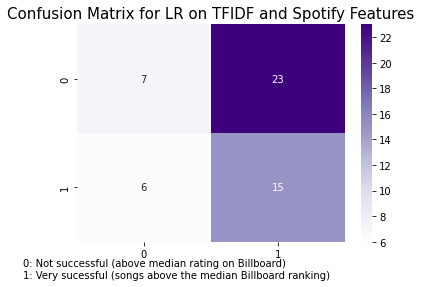

In [28]:
# Fails to classify the songs that did not make it on the billboard
disp_confusion(confusion[0], title="LR on TFIDF and Spotify")

In [29]:
# we care about the weights of the third class because those are the successful songs
feature_importance = pd.DataFrame(features, columns = ["feature"])
feature_importance["importance"] = pow(math.e, model_lr.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
feature_importance[0:15]

,feature,importance
1702,ooh,1.920982
1587,mm,1.741378
494,come,1.648463
1352,kill,1.501046
237,blood,1.423478
1514,man,1.420917
1434,like,1.415979
1219,hope,1.404239
2256,song,1.402962
1541,meet,1.390941


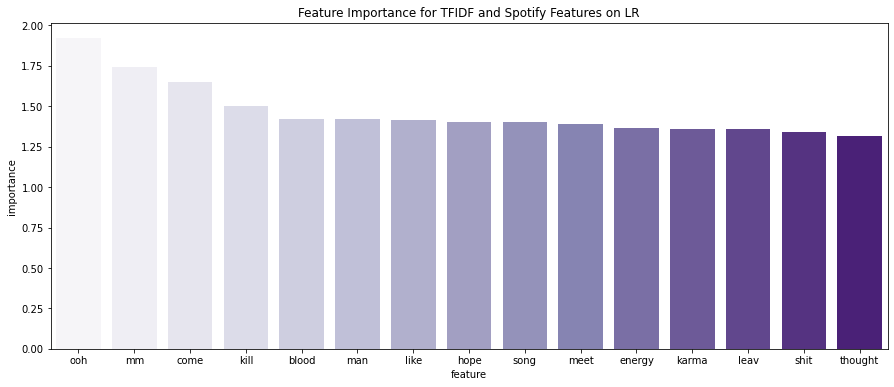

In [30]:
plt.figure(figsize=[15,6])
ax = sns.barplot(feature_importance[0:15], x='feature', y='importance', palette = "Purples") 
plt.title("Feature Importance for TFIDF and Spotify Features on LR")
plt.show()

In [31]:
accuracy = []; f1 = []; confusion = []
model_rf = None
for i in range(5):
    model_rf = RandomForestClassifier().fit(X_train, y_train)
    rf_results = evaluate_model(model_rf)
    accuracy.append(rf_results['accuracy'])
    f1.append(rf_results['f1'])
    confusion.append(rf_results['confusion'])
    
rf_accuracy = np.mean(accuracy)
rf_f1 = np.mean(f1)
print(f"Accuracy: {rf_accuracy}\nF1 Score: {rf_f1}\n")

Accuracy: 0.4470588235294118
F1 Score: 0.42481281297112644



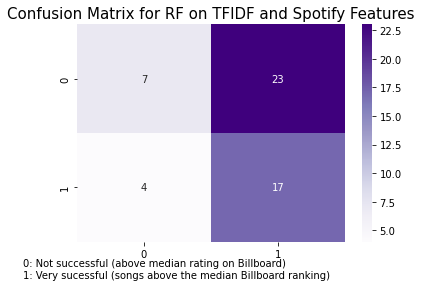

In [32]:
disp_confusion(rf_results['confusion'], title="RF on TFIDF and Spotify")

In [33]:
# we care about the weights of the third class because those are the successful songs
feature_importance = pd.DataFrame(features, columns = ["feature"])
feature_importance["importance"] = model_rf.feature_importances_
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
feature_importance[0:15]

,feature,importance
1690,oh,0.016389
2224,smile,0.012127
2809,tempo,0.011908
210,better,0.010771
2054,said,0.010158
2650,wa,0.009910
2805,liveness,0.009069
2803,energy,0.008565
2807,speechiness,0.008239
850,eye,0.008219


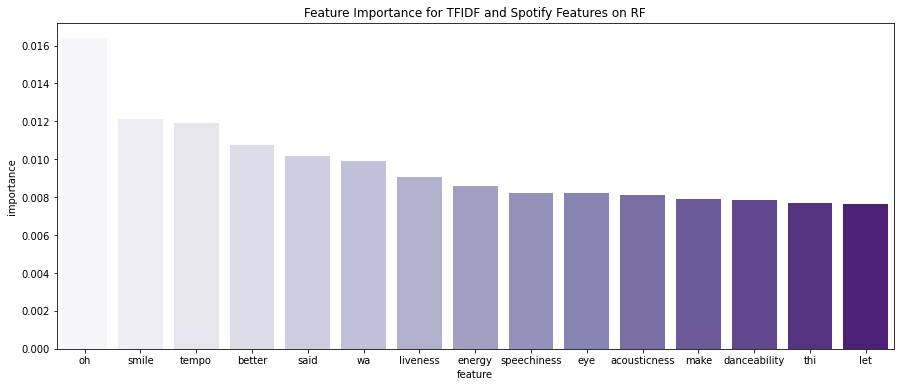

In [34]:
plt.figure(figsize=[15,6])
ax = sns.barplot(feature_importance[0:15], x='feature', y='importance', palette = "Purples") 
plt.title("Feature Importance for TFIDF and Spotify Features on RF")
plt.show()

In [35]:
results = pd.DataFrame(
    {'Model': ['Logistic Regression','Random Forest'], 
    'Accuracy': [lr_accuracy,rf_accuracy],
    'F1 Score': [lr_f1,rf_f1]})
results.set_index('Model',inplace=True)
results

,Accuracy,F1 Score
Model,,
Logistic Regression,0.431373,0.400890
Random Forest,0.447059,0.424813


## TFIDF Kmeans and PCA:

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [53]:
spotify = data.iloc[:,6:15]
spotify

,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0.580,0.57500,0.491,0.000000,0.1210,-6.462,0.0251,0.4250,76.009
12,0.483,0.00349,0.751,0.000000,0.1280,-5.726,0.0365,0.2680,156.092
11,0.612,0.63700,0.394,0.000000,0.1470,-5.723,0.0243,0.2330,96.001
9,0.668,0.11100,0.672,0.000000,0.3290,-4.931,0.0303,0.5390,89.011
8,0.403,0.01770,0.627,0.000000,0.1820,-5.280,0.0292,0.3740,74.900
...,...,...,...,...,...,...,...,...,...
155,0.659,0.73500,0.323,0.003210,0.1160,-13.425,0.0436,0.1540,110.007
153,0.735,0.20400,0.444,0.001200,0.1700,-10.519,0.0684,0.0984,97.038
167,0.646,0.72300,0.529,0.000000,0.0885,-10.179,0.0864,0.7550,87.862
159,0.700,0.06610,0.550,0.000102,0.0910,-9.130,0.0653,0.4120,164.003


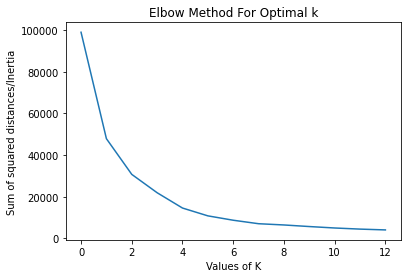

In [69]:
# Elbow method to determine optimal number of clusters
ss_dist = []
K = range(2,15) # possible number of clusters
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(spotify)
    ss_dist.append(kmeans.inertia_)
sns.lineplot(ss_dist, markers=True)
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show();

In [72]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(spotify)
clusters = kmeans.labels_
pca = PCA(n_components=2)
pca_vecs = pca.fit_transform(spotify)
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
print(pca.explained_variance_ratio_)
spotify['Cluster'] = clusters
spotify['x0'] = x0
spotify['x1'] = x1

[0.99202041 0.00791398]


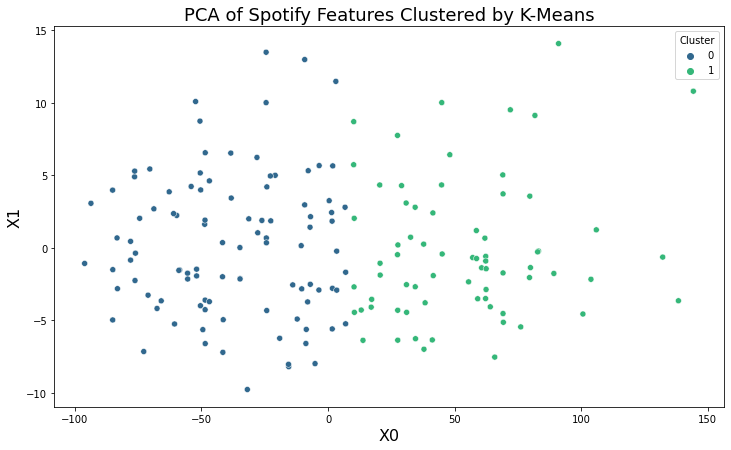

In [74]:
# # set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("PCA of Spotify Features Clustered by K-Means", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the spotify
sns.scatterplot(data=spotify, x='x0', y='x1', hue='Cluster', palette="viridis")
plt.show()

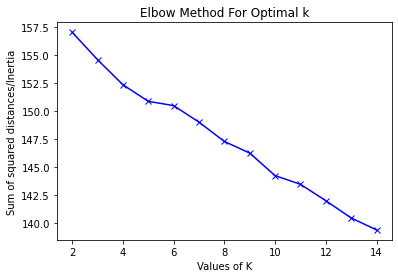

In [38]:
# Elbow method to determine optimal number of clusters
ss_dist = []
K = range(2,15) # possible number of clusters
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_df)
    ss_dist.append(kmeans.inertia_)
plt.plot(K,ss_dist,'bx-')
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show(); # Shows that there is no optimal number of clusters

In [39]:
# For a 10 clusters solution maybe the songs are aligned by albums
kmeans = KMeans(n_clusters=8)
kmeans.fit(tfidf_df)
clusters = kmeans.labels_
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tfidf_df)
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
print(pca.explained_variance_ratio_)
data1 = data.copy()
data1['Cluster'] = clusters
data1['x0'] = x0
data1['x1'] = x1

[0.02465071 0.02130268]


[0.02465071 0.02130268]


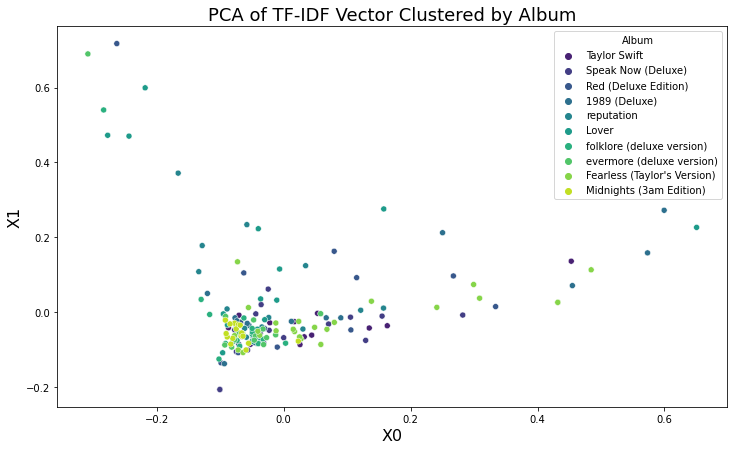

In [43]:
# Cluster by album
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tfidf_df)
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
print(pca.explained_variance_ratio_)
data1['Album'] = data1['album']
data1['x0'] = x0
data1['x1'] = x1

# # set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("PCA of TF-IDF Vector Clustered by Album", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the spotify
sns.scatterplot(data=data1, x='x0', y='x1', hue='Album', palette="viridis")
plt.show()


[0.02465071 0.02130268]


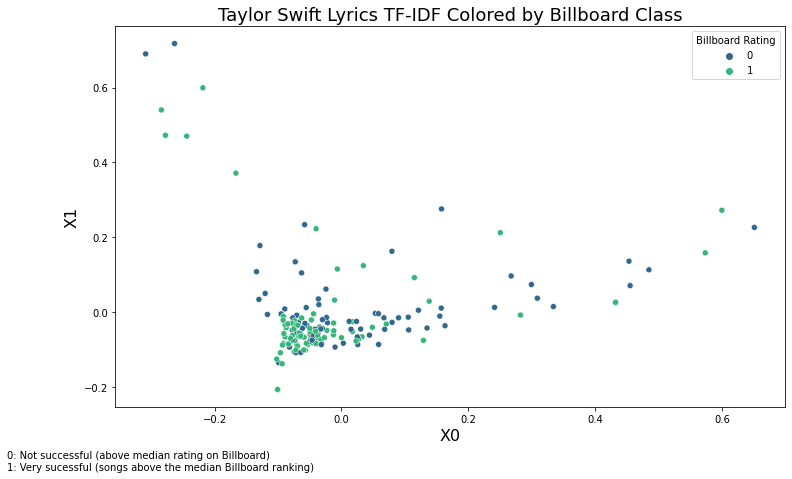

In [41]:
# Cluster by album
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tfidf_df)
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
print(pca.explained_variance_ratio_)
data1['Billboard Rating'] = data1['billboard_rating']
data1['x0'] = x0
data1['x1'] = x1

# # set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("PCA of TF-IDF Vector Clustered by Billboard Class", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the spotify
sns.scatterplot(data=data1, x='x0', y='x1', hue='Billboard Rating', palette="viridis")
plt.figtext(0,0,"0: Not successful (above median rating on Billboard)\n1: Very sucessful (songs above the median Billboard ranking)")
plt.show()
